<a href="https://colab.research.google.com/github/dushyant3615/Movie_analysis/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

Mean Squared Error (MSE): 0.0367
Mean Absolute Error (MAE): 0.1526
R-squared (R2): 0.4280


<ipython-input-29-0bbef15efe8b>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')


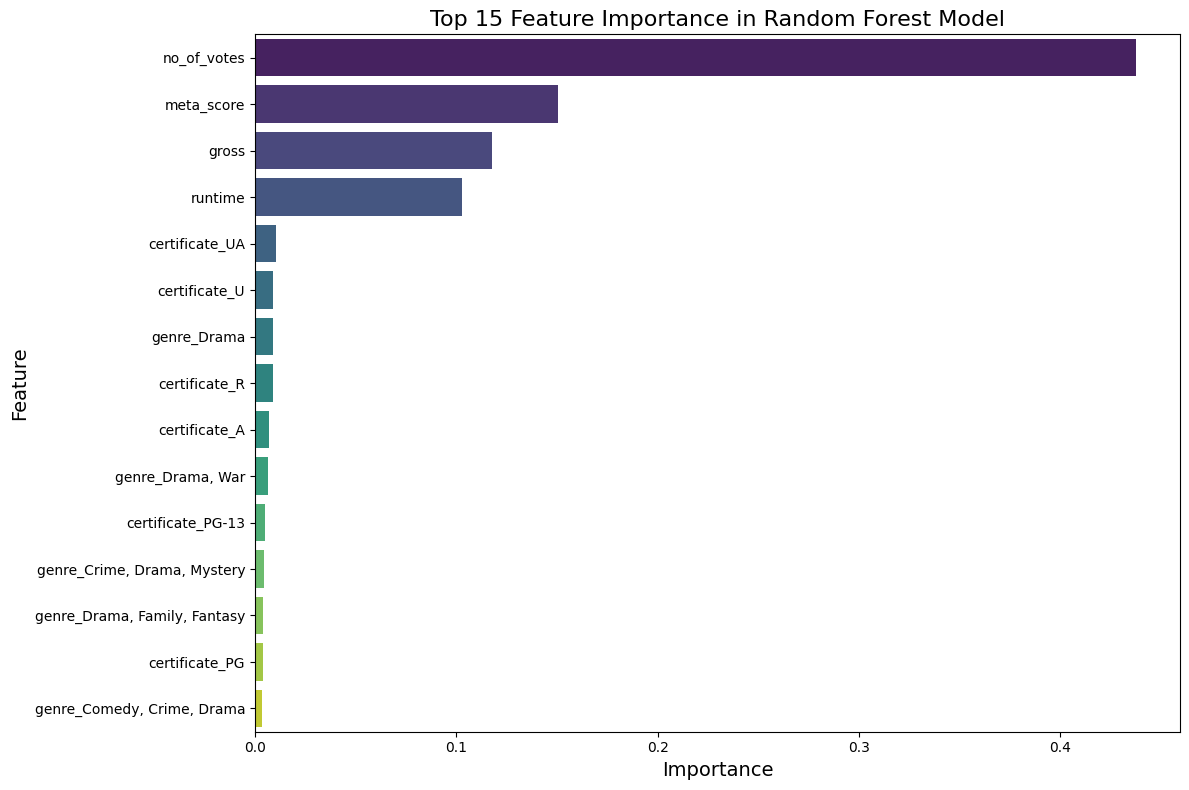

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/imdb_top_1000.csv")

# Clean column names
data.columns = data.columns.str.strip().str.lower()

# Clean numerical columns
data['gross'] = data['gross'].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
data['no_of_votes'] = data['no_of_votes'].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
data['runtime'] = data['runtime'].str.replace(' min', '').apply(pd.to_numeric, errors='coerce')

# Drop rows with missing 'imdb_rating' values
data = data.dropna(subset=['imdb_rating'])

# Fill missing values for relevant numerical columns with median
for col in ['gross', 'no_of_votes', 'runtime', 'meta_score']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['genre', 'certificate'], drop_first=True)

# Select features for modeling
feature_cols = ['runtime', 'gross', 'no_of_votes', 'meta_score'] + \
               list(data.columns[data.columns.str.startswith('genre_')]) + \
               list(data.columns[data.columns.str.startswith('certificate_')])

X = data[feature_cols]
y = data['imdb_rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Feature importance
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Limit the number of features for better visualization
top_n = 15
top_features_df = feature_importance_df.head(top_n)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')
plt.title('Top 15 Feature Importance in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()